# Dry Beans Classification

- Seed quality is definitely influential in crop production. Therefore, seed classification is essential for both marketing and production to provide the principles of sustainable agricultural systems.

- In this notbook we try different algorithms to classify the most well-known 7 types of beans in Turkey; Barbunya, Bombay, Cali, Dermason, Horoz, Seker and Sira, depending **ONLY** on dimension and shape features of bean varieties with no external discriminatory features.

### Data fields

- ID: An ID for this instance
- Area (A): The area of a bean zone and the number of pixels within its boundaries.
- Perimeter (P): Bean circumference is defined as the length of its border.
- MajorAxisLength (L): The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio (K): Defines the relationship between L and l.
- Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
- ConvexArea (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter (Ed): The diameter of a circle having the same area as a bean seed area.
- Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
- Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness (R): Calculated with the following formula: (4* pi * A)/(P^2)
- Compactness (CO): Measures the roundness of an object: Ed/L
- ShapeFactor1 (SF1): L/d
- ShapeFactor2 (SF2): l/d
- ShapeFactor3 (SF3): 4A/(L^2 * pi)
- ShapeFactor4 (SF4): 4A/(L* l * pi)
- y: The class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

## Install required packages

In [1]:
#pip install imbalanced-learn
#pip install featurewiz

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2009950438.py, line 1)

## Importing libraries

In [197]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import os
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss,CondensedNearestNeighbour
from sklearn.utils import class_weight
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, plot_confusion_matrix, classification_report,f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score,RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#import xgboost as xgb
#import lightgbm as lgb
#import catboost as cb
#from lightgbm import *
from sklearn.neural_network import MLPClassifier
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

## Reading the dataset

In [198]:
df = pd.read_csv('dry-beans-data.csv')

In [199]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


- There are 10834 rows and and a total of 16 features.

In [200]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

- There are 7 unique target classes 

### Get Data Summary

In [201]:
df.describe(percentiles=[.25, .5, .75, 0.995]).T

,count,mean,std,min,25%,50%,75%,99.5%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,200711.400000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1716.395500,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,651.184245,738.860154
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,401.341128,460.198497
AspectRatio,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.247550,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.895566,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,203371.050000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,505.523186,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.831485,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.993305,0.994677


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

- No missing values in the training dataset.

### Checking for duplicates

In [203]:
df.duplicated(subset=None, keep='first').sum()

68

## EDA

**1- Count and distribution of all beans categories:**

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


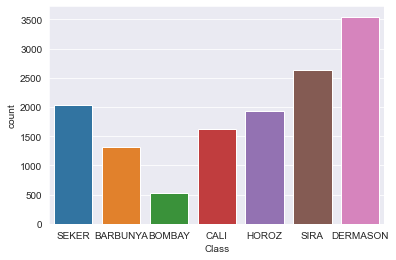

In [204]:
print(df['Class'].value_counts())
_ = sns.countplot(x='Class', data=df)

- We can notice that there is a slight imbalance in the data we need to handle.

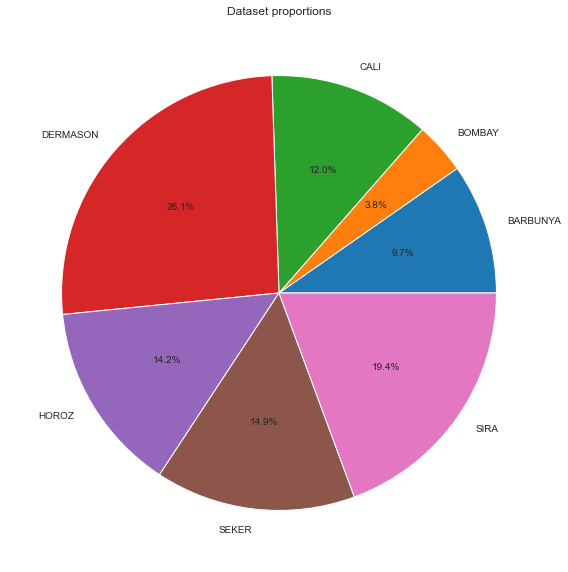

In [205]:
labels, counts = np.unique(df.Class, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

**2- Distribution of numerical features:**

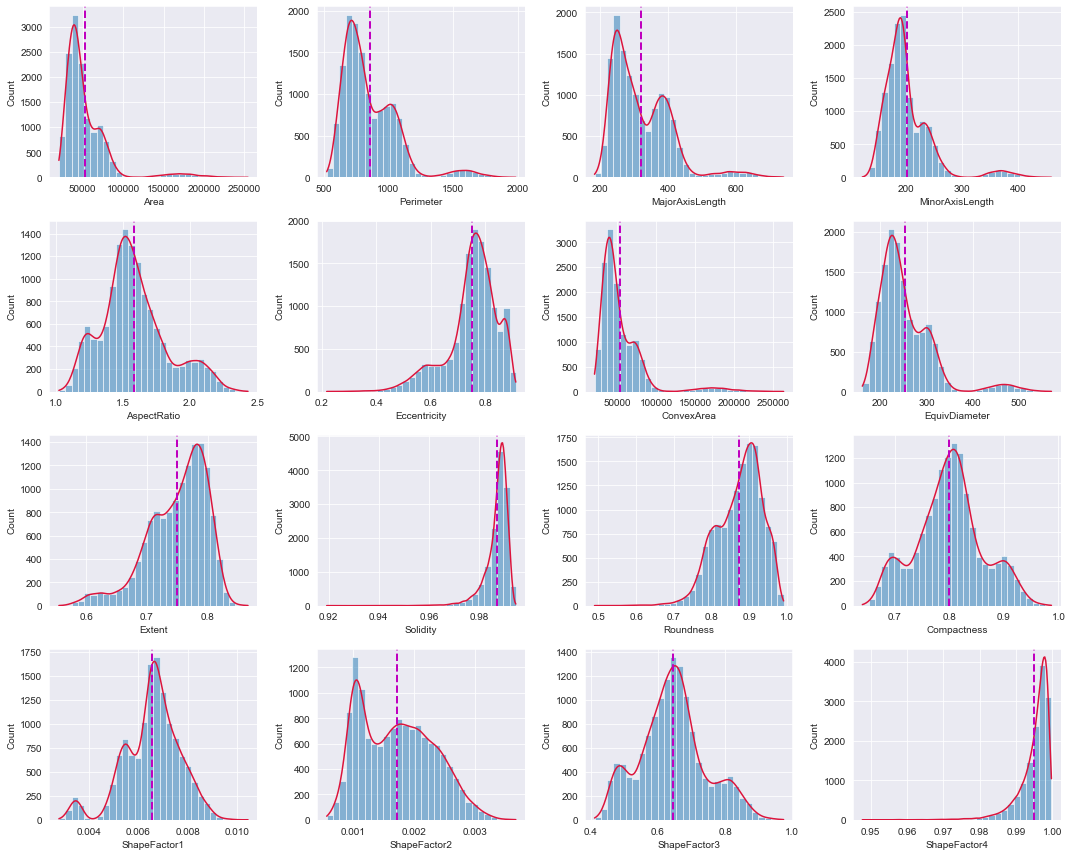

In [206]:
Numeric_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

- Some distributions have long tails and most are **bi-modal** which means that some bean classes should be quite distinct from others. 

**3- Boxplot of numerical features for each type of bean:**

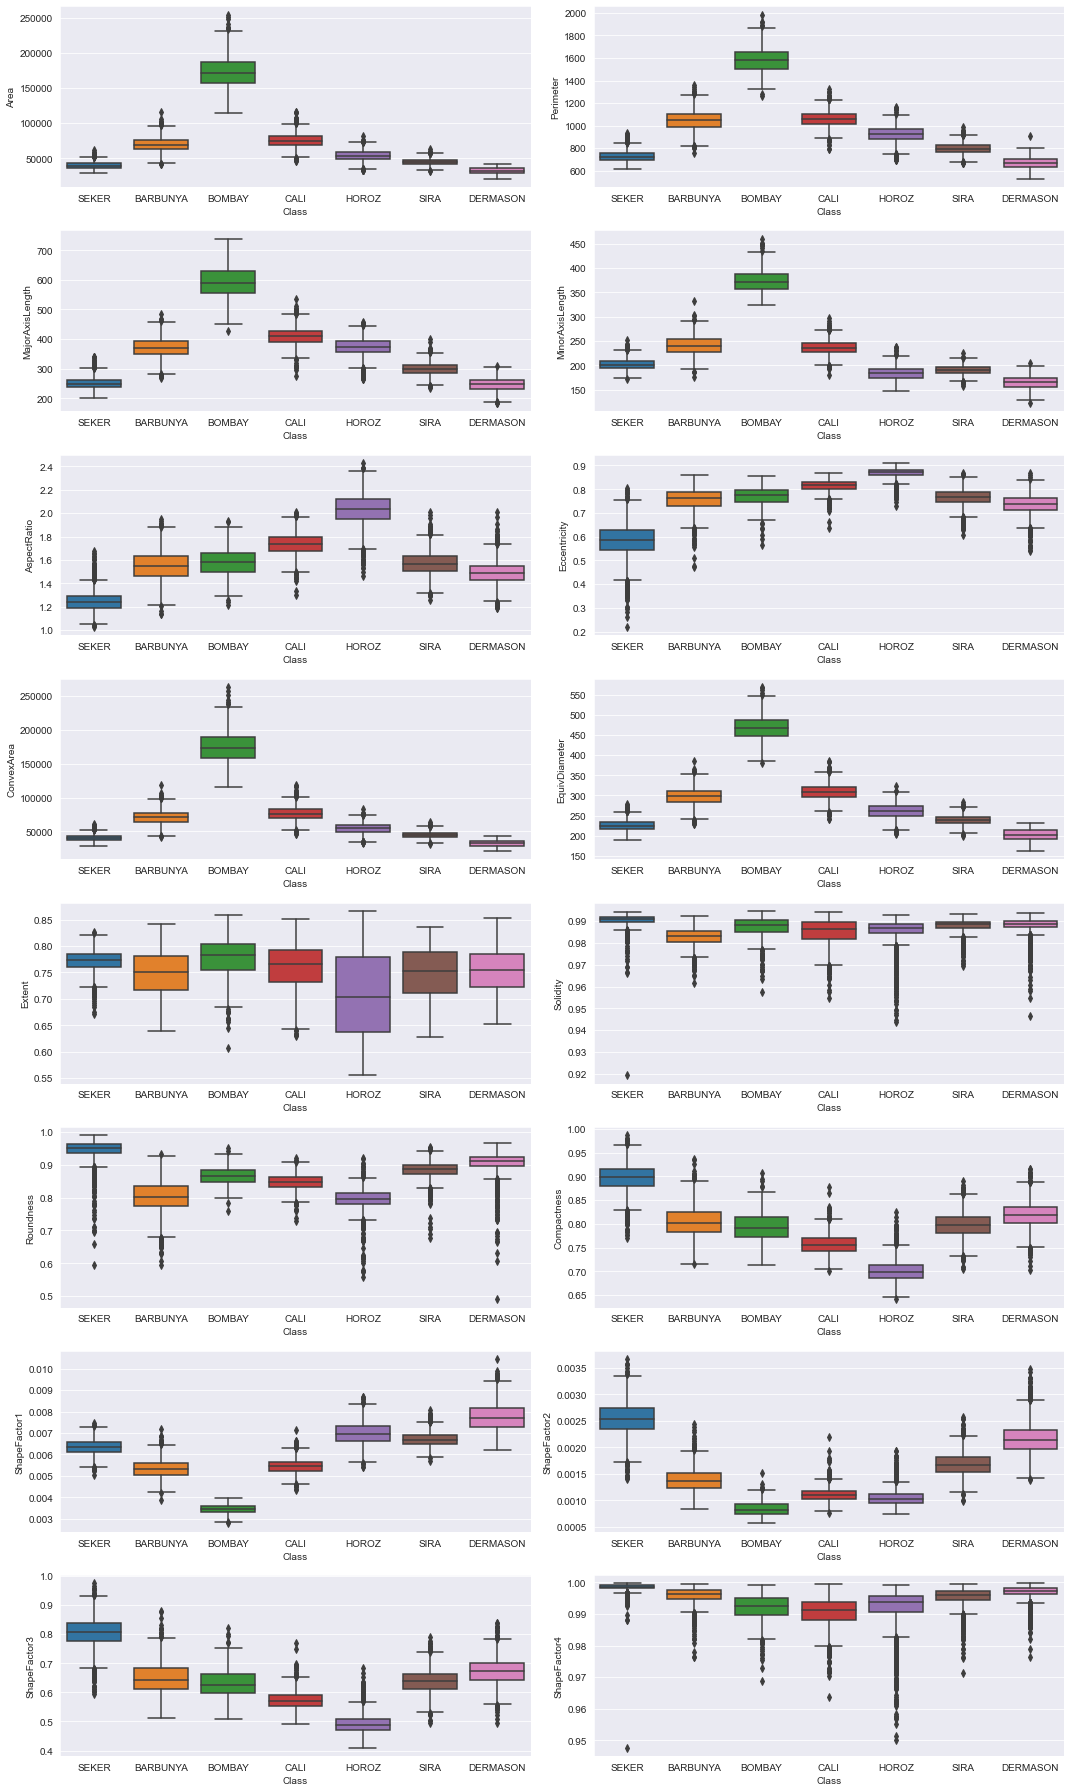

In [207]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot)
plt.tight_layout()

- We can notice that the "Bombay" & "Horoz" classes are distinct from other classes.

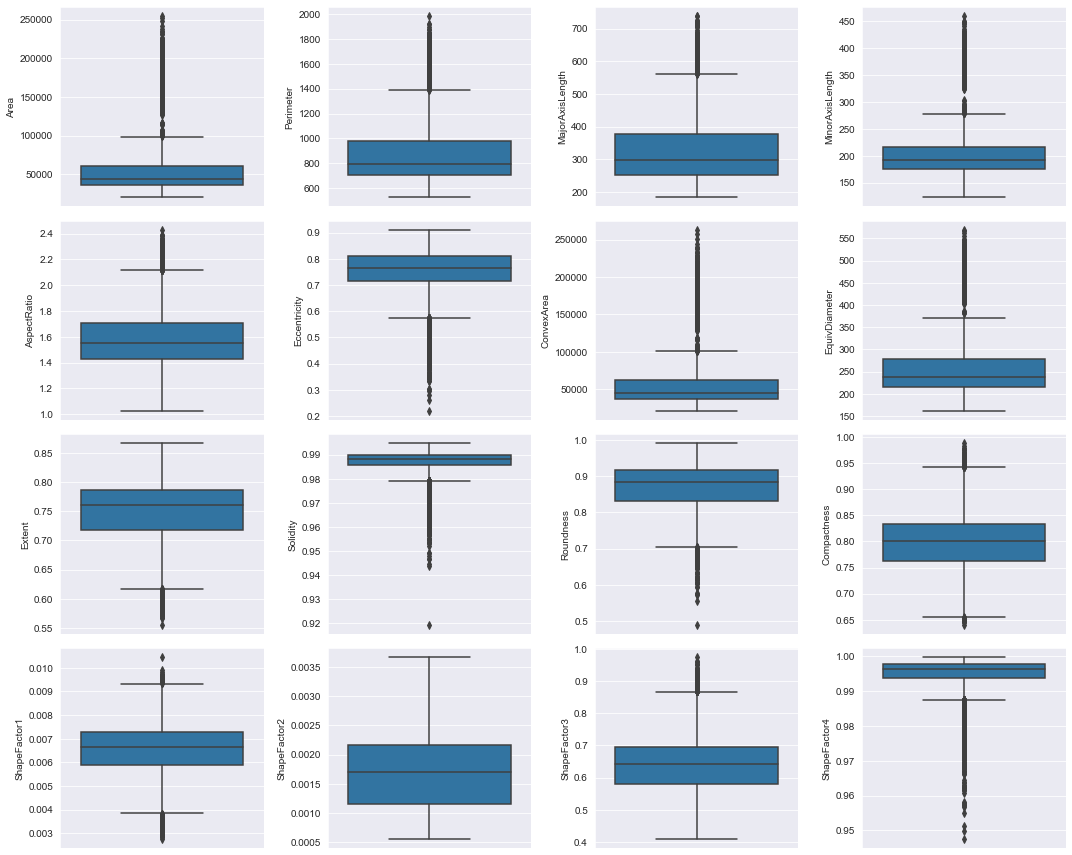

In [208]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot)
plt.tight_layout()

**4- Pearson linear correlation**

<AxesSubplot:>

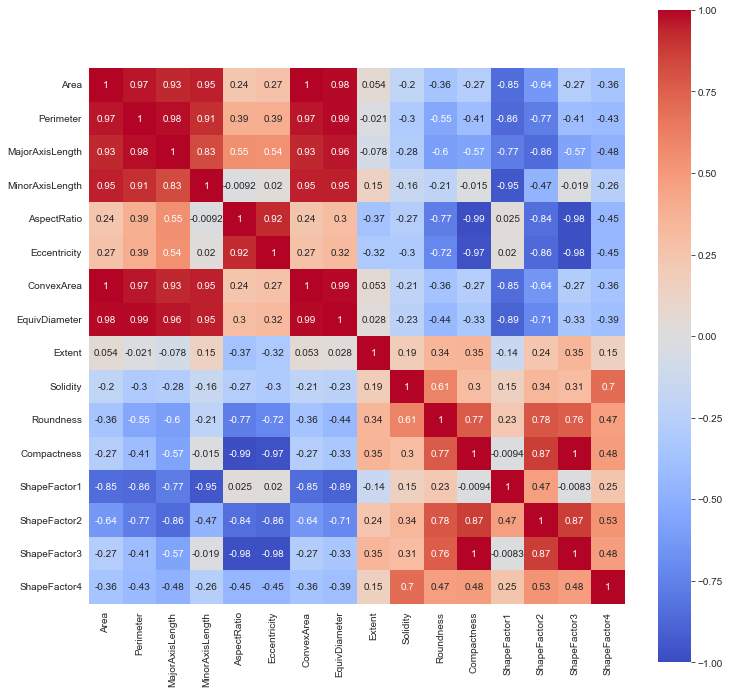

In [209]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

- There are lots of highly correlated features and to examine this multicollinearity more, we will look at the pairwise scatter plots.

**5 - Variables Scatter Pairplots**

## Label Encoding target column 

In [210]:
le = preprocessing.LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [211]:
df['Class'].unique()

array([5, 0, 1, 2, 4, 6, 3])

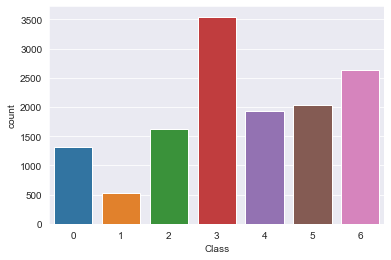

In [212]:
_ = sns.countplot(x='Class', data=df)

## Train Validation split
- We are going to split the data into train and validation sets prior to any normalization or feature scaling, work with the train-splitted set separately and then apply its normalization parameters on the validation and test sets.

In [213]:
features = df.drop(columns=['Class']).columns
train_df, val_df = train_test_split(df, test_size=0.05, random_state=42, stratify = df['Class'])

- **Removing Outliers in some features in the training set within certain threshold**

In [214]:
# train_df = train_df[train_df['Eccentricity'] >= 0.25]
# train_df = train_df[train_df['Solidity'] >= 0.94]
# train_df = train_df[train_df['Roundness'] >= 0.53]
# train_df = train_df[train_df['ShapeFactor4'] >= 0.96]

In [215]:
X_train = train_df[features]
y_train = train_df['Class']

X_val = val_df[features]
y_val = val_df['Class']

X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
9736,50090,837.283,306.410704,209.119224,1.465244,0.730904,50640,252.540232,0.727471,0.989139,0.897876,0.824189,0.006117,0.001741,0.679287,0.995321
8919,45360,784.586,290.296352,199.138930,1.457758,0.727616,45785,240.320922,0.765182,0.990717,0.925980,0.827847,0.006400,0.001854,0.685330,0.999046
5000,79501,1086.552,418.228290,243.725601,1.715980,0.812646,80789,318.156906,0.733404,0.984057,0.846216,0.760725,0.005261,0.001087,0.578703,0.993043
6183,51213,898.686,375.004168,174.840108,2.144841,0.884661,51952,255.355471,0.801769,0.985775,0.796846,0.680940,0.007322,0.000971,0.463680,0.994519
6126,50654,879.938,357.233899,181.407743,1.969232,0.861468,51251,253.958020,0.634857,0.988351,0.822090,0.710901,0.007052,0.001111,0.505381,0.995211


## Feature Scaling

In [216]:
cols = ['Area', 'ConvexArea','MajorAxisLength','Perimeter','MinorAxisLength','EquivDiameter','Eccentricity',
                'ShapeFactor2','Extent','Roundness','AspectRatio','Compactness','ShapeFactor1','ShapeFactor3',
               'ShapeFactor4','Solidity']

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train[cols])
X_train[cols] = pd.DataFrame(X_train_scaled, index=X_train.index)

X_val_scaled = sc.transform(X_val[cols])
X_val[cols] = pd.DataFrame(X_val_scaled, index=X_val.index)

In [217]:
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
9736,-0.100749,-0.083583,-0.159711,0.152082,-0.477841,-0.216650,-0.104927,-0.008584,-0.452864,0.427798,0.412216,0.393624,-0.395761,0.041503,0.360035,0.059921
8919,-0.261944,-0.329350,-0.347733,-0.069593,-0.508213,-0.252392,-0.267879,-0.214921,0.316017,0.766276,0.884299,0.452931,-0.145469,0.231089,0.421107,0.913049
5000,0.901559,1.078956,1.144969,0.920732,0.539418,0.671824,0.906988,1.099426,-0.331893,-0.661916,-0.455533,-0.635256,-1.154300,-1.056392,-0.656417,-0.461850
6183,-0.062477,0.202788,0.640633,-0.609299,2.279345,1.454567,-0.060891,0.038954,1.061971,-0.293496,-1.284838,-1.928751,0.671584,-1.250400,-1.818789,-0.123777
6126,-0.081528,0.115351,0.433290,-0.463424,1.566883,1.202476,-0.084419,0.015356,-2.341116,0.258914,-0.860792,-1.443018,0.432467,-1.015540,-1.397380,0.034790


In [218]:
X_train = X_train.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                                'Perimeter','AspectRatio'])
X_val = X_val.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                            'Perimeter','AspectRatio'])

Train F1_Score:  0.9347254447022428
Val F1_Score:  0.9074889867841409
Train Accuracy:  0.9347254447022428
Val Accuracy:  0.9074889867841409


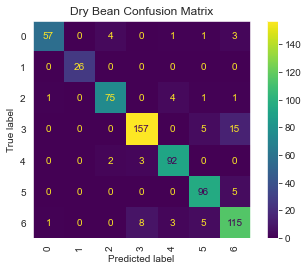

In [222]:
model_svc = SVC()

model_svc.fit(X_train, y_train)

y_pred_train = model_svc.predict(X_train)
y_pred_val = model_svc.predict(X_val)

print("Train F1_Score: ", f1_score(y_train, y_pred_train, average='micro'))
print("Val F1_Score: ", f1_score(y_val, y_pred_val, average='micro'))
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Val Accuracy: ", accuracy_score(y_val, y_pred_val))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_svc, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

# With scaling (STandardScalar) only

In [223]:
# Handle imbalance class problem using SMOTE
# Synthetic Minority Over-sampling Technique
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

def sample_data(X, y, technique='smote'):
    if technique == 'smote':
        sm = SMOTE(random_state=42)
        X_res, y_res = sm.fit_resample(X, y)
    else:
        ad = ADASYN(random_state=42)
        X_res, y_res = ad.fit_resample(X, y)
    return X_res, y_res


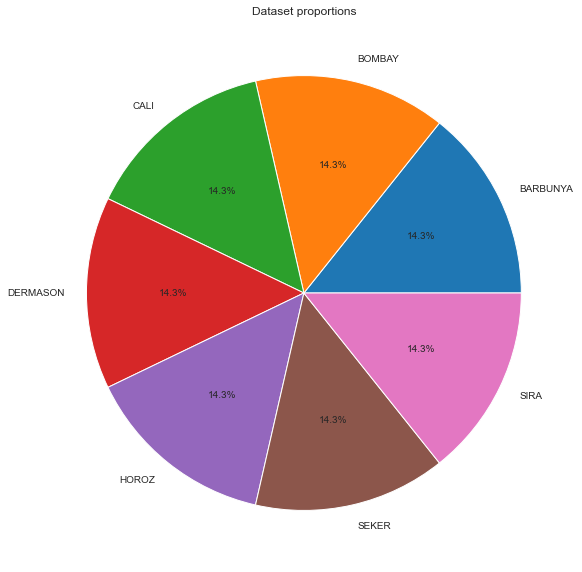

Train F1_Score:  0.6444578737976532
Val F1_Score:  0.6392749244712991
Train Accuracy:  0.6444578737976532
Val Accuracy:  0.6392749244712991


In [225]:
X_res, y_res = sample_data(X, y, technique='smote')

labels, counts = np.unique(y_res, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

model_svc = SVC()

model_svc.fit(X_train, y_train)

y_pred_train = model_svc.predict(X_train)
y_pred_val = model_svc.predict(X_val)

print("Train F1_Score: ", f1_score(y_train, y_pred_train, average='micro'))
print("Val F1_Score: ", f1_score(y_val, y_pred_val, average='micro'))
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Val Accuracy: ", accuracy_score(y_val, y_pred_val))


In [227]:
# Oversampling using ADASYN Technique
X_res, y_res = sample_data(X, y, technique='adasyn')

X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

model_svc = SVC()

model_svc.fit(X_train, y_train)

y_pred_train = model_svc.predict(X_train)
y_pred_val = model_svc.predict(X_val)

print("Train F1_Score: ", f1_score(y_train, y_pred_train, average='micro'))
print("Val F1_Score: ", f1_score(y_val, y_pred_val, average='micro'))
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Val Accuracy: ", accuracy_score(y_val, y_pred_val))


Train F1_Score:  0.5947594190914259
Val F1_Score:  0.5913600661430343
Train Accuracy:  0.5947594190914259
Val Accuracy:  0.5913600661430343


SMOTE gives best results compared to ADASYN oversampling technique.

In [228]:

# Scaling
X_res, y_res = sample_data(X, y, technique='smote')

sc = StandardScaler()
X_res_scaled = sc.fit_transform(X)
X_res = pd.DataFrame(X_res_scaled, index=X.index)

print("Y: {}".format(len(y)))

X_train, X_val, y_train, y_val = train_test_split(X_res, y, test_size=0.2, random_state=42, stratify=y)

model_svc = SVC(probability=True, kernel='rbf', C=25)
model_svc.fit(X_train, y_train)

y_pred_train = model_svc.predict(X_train)
y_pred_val = model_svc.predict(X_val)

print("Train F1_Score: ", f1_score(y_train, y_pred_train, average='micro'))
print("Val F1_Score: ", f1_score(y_val, y_pred_val, average='micro'))
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Val Accuracy: ", accuracy_score(y_val, y_pred_val))


Y: 13611
Train F1_Score:  0.9428728875826599
Val F1_Score:  0.9258171134777818
Train Accuracy:  0.9428728875826599
Val Accuracy:  0.9258171134777818


In [229]:
from sklearn.preprocessing import MinMaxScaler


# Scaling
X_res, y_res = sample_data(X, y, technique='smote')

sc = MinMaxScaler()
X_res_scaled = sc.fit_transform(X)
X_res = pd.DataFrame(X_res_scaled, index=X.index)

sc = StandardScaler()
X_res_scaled = sc.fit_transform(X)
X_res = pd.DataFrame(X_res_scaled, index=X.index)

print("Y: {}".format(len(y)))

X_train, X_val, y_train, y_val = train_test_split(X_res, y, test_size=0.2, random_state=42, stratify=y)

model_svc = SVC(probability=True, kernel='rbf', C=25)
model_svc.fit(X_train, y_train)

y_pred_train = model_svc.predict(X_train)
y_pred_val = model_svc.predict(X_val)

print("Train F1_Score: ", f1_score(y_train, y_pred_train, average='micro'))
print("Val F1_Score: ", f1_score(y_val, y_pred_val, average='micro'))
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Val Accuracy: ", accuracy_score(y_val, y_pred_val))


Y: 13611
Train F1_Score:  0.9428728875826599
Val F1_Score:  0.9258171134777818
Train Accuracy:  0.9428728875826599
Val Accuracy:  0.9258171134777818


In [123]:
# Hyperparameter Tuning
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 25, 50],  # Example range, can be extended
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Example range for RBF kernel
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(probability=True, kernel="rbf"), param_grid, cv=5, scoring='f1_micro', verbose=1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# The best hyperparameters found
print("Best Parameters: ", grid_search.best_params_)

# You can use the best estimator directly from the grid search
model_svc = grid_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters:  {'C': 25, 'gamma': 'scale'}


Best Parameters:  {'C': 25, 'gamma': 'scale'}

In [124]:
y_pred_train = model_svc.predict(X_train)
y_pred_val = model_svc.predict(X_val)

print("Train F1_Score: ", f1_score(y_train, y_pred_train, average='micro'))
print("Val F1_Score: ", f1_score(y_val, y_pred_val, average='micro'))
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Val Accuracy: ", accuracy_score(y_val, y_pred_val))

Train F1_Score:  0.9258171134777818
Val F1_Score:  0.9258171134777818
Train Accuracy:  0.9258171134777818


### Feature importance

Text(0.5, 0, 'Permutation Importance')

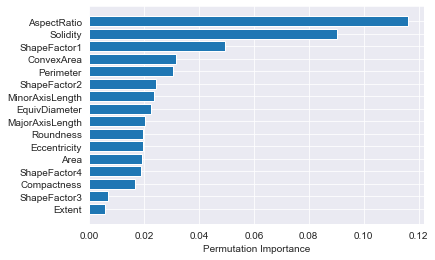

In [131]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# svc =  SVC(kernel='rbf', C=25)
# svc.fit(X_train, y_train)

perm_importance = permutation_importance(model_svc, X_val, y_val)

feature_names = ['Area', 'ConvexArea','MajorAxisLength','Perimeter','MinorAxisLength','EquivDiameter','Eccentricity',
                'ShapeFactor2','Extent','Roundness','AspectRatio','Compactness','ShapeFactor1','ShapeFactor3',
               'ShapeFactor4','Solidity']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

As the features `Extent`, `ShapeFactor3` contribute less, let's remove these.

In [139]:
df = pd.read_csv("dry-beans-data.csv")

X = df.drop(columns=['Class'])
y = df['Class']

#features_to_keep = ['ShapeFactor1', 'ShapeFactor3', 'Compactness', 'EquivDiameter', 'Area', 'Perimeter', 'AspectRatio']

# Select only these features from the DataFrame
#X = df[features_to_keep]

features_to_exclude = ['Extent', 'ShapeFactor3', "Compactness"]
X = X.drop(columns=features_to_exclude)

X_res, y_res = sample_data(X, y, technique='smote')

sc = StandardScaler()
X_res_scaled = sc.fit_transform(X)
X_res = pd.DataFrame(X_res_scaled, index=X.index)

print("Y: {}".format(len(y)))

X_train, X_val, y_train, y_val = train_test_split(X_res, y, test_size=0.2, random_state=42, stratify=y)

model_svc = SVC(probability=True, kernel='rbf', C=25, gamma="scale")
model_svc.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_val, model_svc.predict(X_val), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_svc.predict(X_val), average='micro'))
print("Train Accuracy: ", metrics.accuracy_score(y_val, model_svc.predict(X_val)))



Y: 13611
Train F1_Score:  0.9254498714652957
Val F1_Score:  0.9254498714652957
Train Accuracy:  0.9254498714652957


In [143]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=12)  # Select top 10 features



In [148]:
selected_features = selector.get_support(indices=True)
selected_names = [feature_names[i] for i in selected_features]

# Print the names of the selected features
print("Selected feature names:", selected_names)

Selected feature names: ['Area', 'ConvexArea', 'MajorAxisLength', 'Perimeter', 'MinorAxisLength', 'EquivDiameter', 'Eccentricity', 'ShapeFactor2', 'Roundness', 'Compactness']


In [168]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("dry-beans-data.csv")

le = preprocessing.LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Create the SVM classifier
model_svc = SVC(probability=True, kernel='rbf', C=25, gamma="scale")
model_svc.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred_train = model_svc.predict(X_train_res)
y_pred_val = model_svc.predict(X_val_scaled)

print("Train F1_Score: ", f1_score(y_train_res, y_pred_train, average='micro'))
print("Val F1_Score: ", f1_score(y_val, y_pred_val, average='micro'))
print("Train Accuracy: ", accuracy_score(y_train_res, y_pred_train))
print("Val Accuracy: ", accuracy_score(y_val, y_pred_val))


Train F1_Score:  0.9501485472581701
Val F1_Score:  0.9232464193903782
Train Accuracy:  0.9501485472581701
Val Accuracy:  0.9232464193903782


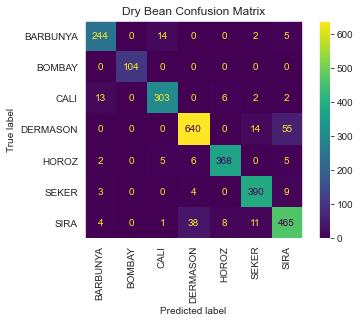

In [170]:
plot_confusion_matrix(model_svc, X_val_scaled, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

### Feature Selection

In [179]:
from sklearn.feature_selection import SelectKBest, chi2


df = pd.read_csv("dry-beans-data.csv")
X = df.drop(columns=['Class'])
y = df['Class']

selector = SelectKBest(chi2, k=16)
selector.fit(X,y) 
selected_features = selector.get_support(indices=True)
selected_names = [feature_names[i] for i in selected_features]

print("Selected feature names:", selected_names)

X = df[selected_names]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_val_scaled = scaler.transform(X_val_scaled)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Create the SVM classifier
model_svc = SVC(probability=True, kernel='rbf', C=25, gamma="scale")
model_svc.fit(X_train_res, y_train_res)

# Evaluate the model
y_pred_train = model_svc.predict(X_train_res)
y_pred_val = model_svc.predict(X_val_scaled)

print("Train F1_Score: ", f1_score(y_train_res, y_pred_train, average='micro'))
print("Val F1_Score: ", f1_score(y_val, y_pred_val, average='micro'))
print("Train Accuracy: ", accuracy_score(y_train_res, y_pred_train))
print("Val Accuracy: ", accuracy_score(y_val, y_pred_val))


Selected feature names: ['Area', 'ConvexArea', 'MajorAxisLength', 'Perimeter', 'MinorAxisLength', 'EquivDiameter', 'Eccentricity', 'ShapeFactor2', 'Extent', 'Roundness', 'AspectRatio', 'Compactness', 'ShapeFactor1', 'ShapeFactor3', 'ShapeFactor4', 'Solidity']
Train F1_Score:  0.9547812075129665
Val F1_Score:  0.9250826294528093
Train Accuracy:  0.9547812075129665
Val Accuracy:  0.9250826294528094


In [195]:
from sklearn.feature_selection import SelectKBest, chi2


df = pd.read_csv("dry-beans-data.csv")
X = df.drop(columns=['Class'])
y = df['Class']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_scaled)
# X_val_scaled = scaler.transform(X_val_scaled)

X_train_scaled=X_train
X_val_scaled=X_val_scaled

# Create the SVM classifier
model_svc = SVC(probability=True)
model_svc.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_train = model_svc.predict(X_train_scaled)
y_pred_val = model_svc.predict(X_val_scaled)


In [196]:
print("Train F1_Score: ", f1_score(y_train, y_pred_train, average='micro'))
#print("Val F1_Score: ", f1_score(y_train, y_pred_val, average='micro'))
print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Val Accuracy: ", accuracy_score(y_val, y_pred_val))

Train F1_Score:  0.6340007347538574
Train Accuracy:  0.6340007347538574
Val Accuracy:  0.26037458685273596
